# District Model of House Price

## 1. Load Data

In [54]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
# from model import score # 自己写太费劲了，暂时先用cross_val_score凑合一下
import matplotlib.pyplot as plt
%matplotlib inline 

# PATH1 = 'C:/Users/Dl/Documents/GitHub/learning_notes/project/kaggle/houseprice/data/'
PATH = 'H:/learning_notes/project/kaggle/houseprice/data/'
train_data = pd.read_csv(PATH + 'train.csv')
test_data = pd.read_csv(PATH + 'test.csv')

In [55]:
train_data['AVG_PRICE'] = train_data['SalePrice']/train_data['GrLivArea']

### MSSubClass

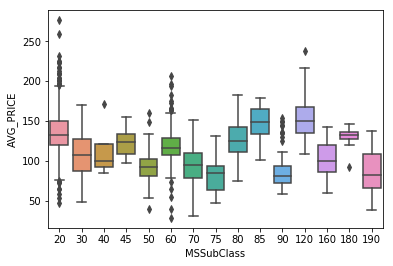

In [56]:
sns.boxplot(x='MSSubClass',y='AVG_PRICE',data = train_data)

#### modeling

In [57]:
clf = Ridge()
s = StandardScaler()
x = train_data['MSSubClass'].reshape(-1,1)
x = s.fit_transform(x)
y = train_data['AVG_PRICE']
print(np.mean(cross_val_score(clf,x,y,cv=5)))

0.0323694200949


H:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
H:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### MSZoning

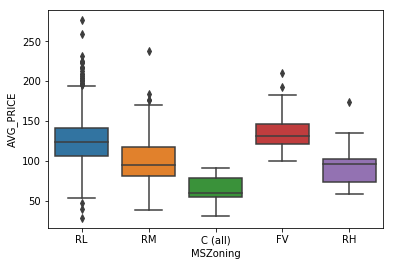

In [58]:
sns.boxplot(x='MSZoning',y='AVG_PRICE',data=train_data)
train_data['MSZoning'] = train_data['MSZoning'].replace({'RL':5,'RM':3,'C (all)':1,'FV':4,'RH':2})

#### modeling

In [59]:
clf = Ridge()
x = train_data[['MSSubClass','MSZoning']]
x = s.fit_transform(x)
y = train_data['AVG_PRICE']
print(np.mean(cross_val_score(clf,x,y,cv=5)))

0.0910288711845


### LotFrontage

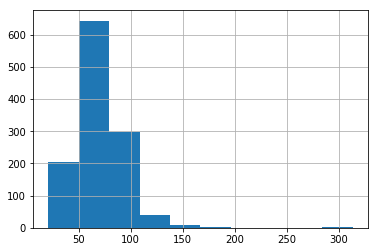

In [60]:
train_data.LotFrontage.hist()

In [61]:
train_data.LotFrontage.isnull().sum(),train_data.LotArea.isnull().sum()

(259, 0)

In [62]:
# fillna with the median of lotfrontage in neighborhood
# mean works better than median
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
# train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
# train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
clf = Ridge()
x = train_data[['MSSubClass','MSZoning','LotFrontage','LotArea']]
x = s.fit_transform(x)
y = train_data['AVG_PRICE']
print(np.mean(cross_val_score(clf,x,y,cv=5)))

0.0895086489392


### Street & Alley

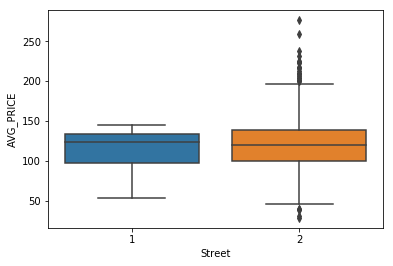

In [63]:
train_data['Street'] = train_data['Street'].replace({'Grvl':1,'Pave':2})
train_data['Alley'] = train_data['Alley'].fillna(train_data['Alley'].mode()[0])
train_data['Alley'] = train_data['Alley'].replace({'Grvl':1,'Pave':2})
sns.boxplot(x='Street',y='AVG_PRICE',data=train_data)

1    1419
2      41
Name: Alley, dtype: int64

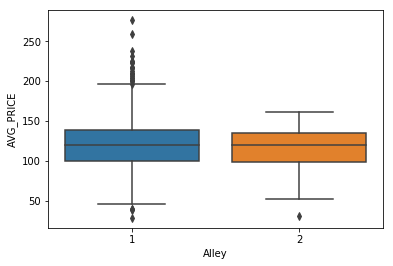

In [64]:
sns.boxplot(x='Alley',y='AVG_PRICE',data=train_data)
train_data.Alley.value_counts()

In [65]:
clf = Ridge()
x = train_data[['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley']]
x = s.fit_transform(x)
y = train_data['AVG_PRICE']
print(np.mean(cross_val_score(clf,x,y,cv=5)))

0.0860998826622


### Neighborhood

[('StoneBr', 165.40227532235392), ('NridgHt', 164.57805723210183), ('Veenker', 154.9809137507573), ('Somerst', 141.33596642481217), ('Timber', 139.76648322039006), ('CollgCr', 136.78367951579068), ('Blmngtn', 136.56697363609894), ('NoRidge', 132.27168705070494), ('Mitchel', 126.01744863615828), ('ClearCr', 124.24298891029503), ('Crawfor', 120.25482638137277), ('SawyerW', 119.7044242196549), ('Gilbert', 119.11493125681702), ('Sawyer', 117.85616299660873), ('NPkVill', 116.72689144012816), ('NAmes', 116.08938532777015), ('NWAmes', 111.84834925438753), ('BrkSide', 105.96680854866042), ('MeadowV', 101.92620057171746), ('Edwards', 101.83295816841986), ('Blueste', 98.96936920731005), ('BrDale', 91.95054338209853), ('OldTown', 91.42728199677265), ('IDOTRR', 89.13604251048629), ('SWISU', 84.75523335164971)]


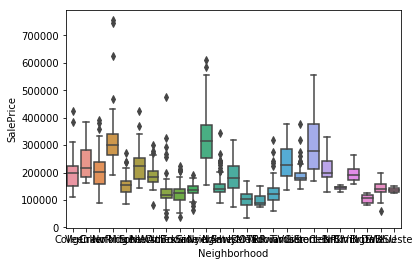

In [66]:
sns.boxplot(x='Neighborhood',y='SalePrice',data=train_data)
neighbors = list(set(train_data.Neighborhood))
neighbor_list = []
for n in neighbors:
    neighbor_list.append(tuple((n,train_data[train_data.Neighborhood==n]['AVG_PRICE'].mean())))
print(sorted(neighbor_list,key = lambda x:x[1],reverse=True))

In [67]:
# 'SWISU','IDOTRR','OldTown','BrDale':1
# 'Blueste','Edwards','MeadowV','BrkSide':2
# 'NWAmes','NAmes','NPkVill','Sawyer','Gilbert','SawyerW','Crawfor':3
# 'ClearCr','Mitchel','NoRidge','Blmngtn','CollgCr','Timber','Somerst':4
# 'Veenker','NridgHt','StoneBr':5
'''neighbor_dict = defaultdict(int)
for n in ['SWISU','IDOTRR','OldTown','BrDale']:
    neighbor_dict[n] = 1
for n in ['Blueste','Edwards','MeadowV','BrkSide']:
    neighbor_dict[n] = 2
for n in ['NWAmes','NAmes','NPkVill','Sawyer','Gilbert','SawyerW','Crawfor']:
    neighbor_dict[n] = 3
for n in ['ClearCr','Mitchel','NoRidge','Blmngtn','CollgCr','Timber','Somerst']:
    neighbor_dict[n] = 4
for n in ['Veenker','NridgHt','StoneBr']:
    neighbor_dict[n] = 5
train_data['Neighborhood'] = train_data['Neighborhood'].replace(neighbor_dict)
sns.boxplot(x='Neighborhood',y='SalePrice',data=train_data)'''

"neighbor_dict = defaultdict(int)\nfor n in ['SWISU','IDOTRR','OldTown','BrDale']:\n    neighbor_dict[n] = 1\nfor n in ['Blueste','Edwards','MeadowV','BrkSide']:\n    neighbor_dict[n] = 2\nfor n in ['NWAmes','NAmes','NPkVill','Sawyer','Gilbert','SawyerW','Crawfor']:\n    neighbor_dict[n] = 3\nfor n in ['ClearCr','Mitchel','NoRidge','Blmngtn','CollgCr','Timber','Somerst']:\n    neighbor_dict[n] = 4\nfor n in ['Veenker','NridgHt','StoneBr']:\n    neighbor_dict[n] = 5\ntrain_data['Neighborhood'] = train_data['Neighborhood'].replace(neighbor_dict)\nsns.boxplot(x='Neighborhood',y='SalePrice',data=train_data)"

In [69]:
clf = Ridge()
df = pd.get_dummies(train_data['Neighborhood'])
x = train_data[['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley']]
x = pd.concat([x,df],axis=1)
print(x.shape)
# x = s.fit_transform(x)
y = train_data['AVG_PRICE']
print(np.mean(cross_val_score(clf,x,y,cv=5)))

(1460, 31)
0.400974018713
